# Simple 1D Random Walk

The simplest random walk consists of a walker that moves left or right by a discrete distance of $\pm{1}$ at each step with equal probability of moving in either direction. 

Each step is defined: $$\textcolor{aquamarine}{x_{n}=x_{n-1}+\Delta{x}}$$

where $\Delta{x}$ is a random variable that can be either $+1$ or $-1$. 

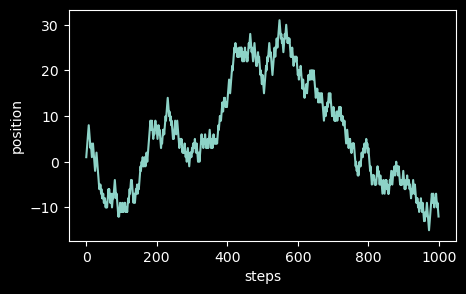

In [138]:
# Simple 1D random walk

import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_steps=1000 # The number of steps in the walk

# Model
steps=np.random.choice([-1, 1], size=num_steps)
position=np.cumsum(steps)

# Plotting
plt.style.use('dark_background')
plt.figure(figsize=(5,3))
plt.plot(position)
plt.xlabel('steps')
plt.ylabel('position')
plt.show()

## Scaling to time

The model is time independent in its current form. Let's define a timestep $\tau$ such that $$\textcolor{aquamarine}{t=n\tau}$$

where t is time in seconds, n is the number of steps, and $\tau$ is the time required to move one full step. 

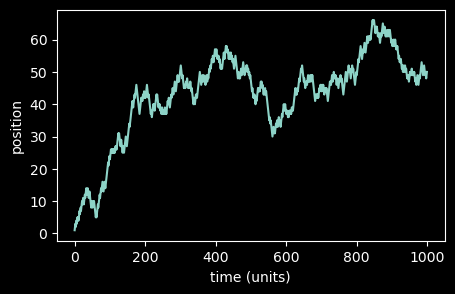

In [159]:
# Simple 1D random walk scaled to time

import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_steps=10**3 # The number of steps in the walk
time_step = 0.1 # Time required for one full step

# Model
time_array=np.arange(1, num_steps+1)

steps=np.random.choice([-1, 1], size=num_steps)

position=np.cumsum(steps)

# Plotting
plt.style.use('dark_background')
plt.figure(figsize=(5,3))
plt.plot(position)
plt.xlabel('time (units)')
plt.ylabel('position')
plt.show()

## Predicting Average Position

In the previous simulations, the step length and probability of choosing a particular direction were constant. Here, we will generalize the model to account for different step lengths and probabilities. Reference: [Univ. of Utah- Random Walks](https://goldenberg.biology.utah.edu/courses/biol3550/courseMaterial/notes/3550_notes_3randomWalks.pdf)

The maximun position of the random walker after $n$ steps is $n\cdot{l}$ and the minimum is $n\cdot{-l}$, where $\pm{l}$ is the direction and length of each step. $\delta_i$ represents the step length in either direction $\pm{l}$.   

The position of the random walker after $n$ steps is:

$$
\textcolor{aquamarine}{x_{n}=\sum_{i=1}^n{\delta_i}}
$$

The average, or expected value, of the $\delta_i$ for any individual step with a step to the left probability $p_-$ and step to the right probability $p_+$ is given by: 

$$
\textcolor{aquamarine}{\begin{array}{lll}E(\delta_i)= lp_{+}-lp_{-} \\ = lp_{+}-l(1-p_{+}) \\ = l(2p_{+}-1)\end{array}}
$$

Expected values of independent random variables $X$ and $Y$ have the following property: 

$$
\textcolor{aquamarine}{E(X + Y) = E(X) + E(Y)}
$$

And since $x_n$ is the sum of $\delta_i$ we have:

$$
\textcolor{aquamarine}{\begin{array}{lll}E(x_n) = \sum_{i=1}^n{\delta_i} \\ = nl(2p_{+}-1)\end{array}}
$$

So if the probability of taking a step in either direction is equal for both instances, say $p_{\pm}=0.5$, then the average position of the particle will be zero (or the origin point of the walk if it starts at a different initial position). If the probability were $> 0.5$ the walk would favor a positive position, and a negative position otherwise. 

Note a process is called `ergodic` when the time average position of an individual walker $E(x_n)$ equals the ensemble average position of many random walkers
$$
\textcolor{aquamarine}{\frac{1}{N}\sum_{j=1}^N{x_{n,j}}}
$$ 

where N is the number of individual random walkers and $x_{n,j}$ is the position after the $n^{th}$ step of the $j^{th}$ walker. 

## Current and Average Position Plot

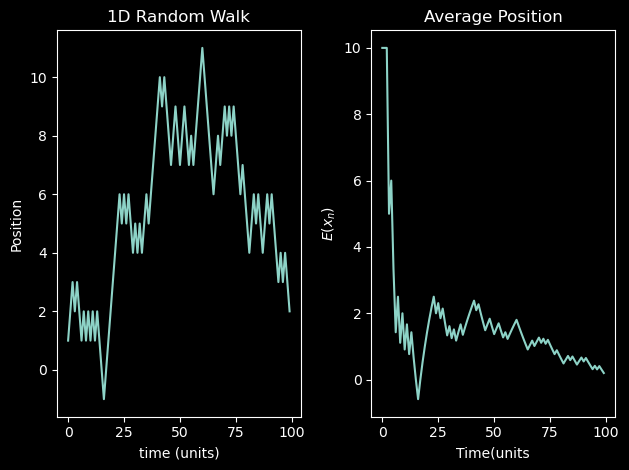

In [2]:
# CUrrent and average position of a simple 1D random walk

import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_steps=10**2 # The number of steps in the walk
time_step = 0.1 # Time required for one full step

# Model
time_array=np.arange(1, num_steps+1) * time_step

steps=np.random.choice([-1, 1], size=num_steps)

position=np.cumsum(steps)

average_position = position / time_array

# Set the plot style
with plt.style.context('dark_background'):

    # Plot the random walk position
    plt.subplot(1, 2, 1)
    plt.plot(position)
    plt.title("1D Random Walk")
    plt.xlabel("time (units)")
    plt.ylabel("Position")

    # Plot the average position over steps
    plt.subplot(1, 2, 2)
    plt.plot(average_position)
    plt.title("Average Position")
    plt.xlabel("Time(units")
    plt.ylabel('$E(x_n)$')

    plt.tight_layout()
    plt.show()

## Adding Plot Animations

In [4]:
# Position and Variance of a simple 1D random walk

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import Video

# Parameters
num_steps=10**3 # The number of steps in the walk
time_step = 0.1 # Time required for one full step
t=int(num_steps * time_step)
time_array=np.arange(1, num_steps+1)

# Model
steps=np.random.choice([-1, 1], size=num_steps)

position=np.cumsum(steps)

average_position = position / time_array


# Animated Plots
with plt.style.context("dark_background"):
    # Set up the figure and axes
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5,3))

    # Initialize lines for position and variance
    line1, = ax1.plot([], [], lw=2)
    line2, = ax2.plot([], [], lw=2)

    # Set up the axes limits and labels
    ax1.set_xlim(0, t)
    ax1.set_ylim(position.min() * 1.1, position.max() * 1.1)
    ax1.set_title("1D Random Walk")
    ax1.set_xlabel("Time (units)")
    ax1.set_ylabel("Position")

    ax2.set_xlim(0, t)
    ax2.set_ylim(0, average_position.max() * 1.1)
    ax2.set_title("Average Position")
    ax2.set_xlabel("Time (units)")
    ax2.set_ylabel("$E(x_n)$")

    # Initialization function to clear the data at the start of the animation
    def init():
        line1.set_data([], [])
        line2.set_data([], [])
        return line1, line2

    # Update function for each frame
    def update(frame):
        # Update position line (up to current frame)
        line1.set_data(np.arange(frame), position[:frame])
    
        # Update variance line (up to current frame)
        line2.set_data(np.arange(frame), average_position[:frame])
    
        return line1, line2

    # Create the animation
    '''
    ani = FuncAnimation(fig, update, frames=np.arange(1, t, int(t / 100)),  # Use a subset of frames
                    init_func=init, blit=False, interval=10) '''


    ani = FuncAnimation(fig, update, frames=np.arange(1, t, int(t / 100)),  # Use a subset of frames
                    init_func=init, blit=False, interval=10)


    # Save the animation as an MP4 using ffmpeg
    ani.save("1D_SRW_Avg.mp4", writer="ffmpeg", fps=15)

# Display the saved video in Jupyter Notebook (optional)
video=Video("1D_SRW_Avg.mp4", embed=True)
display(video)

plt.close(fig)

## Variance of Position

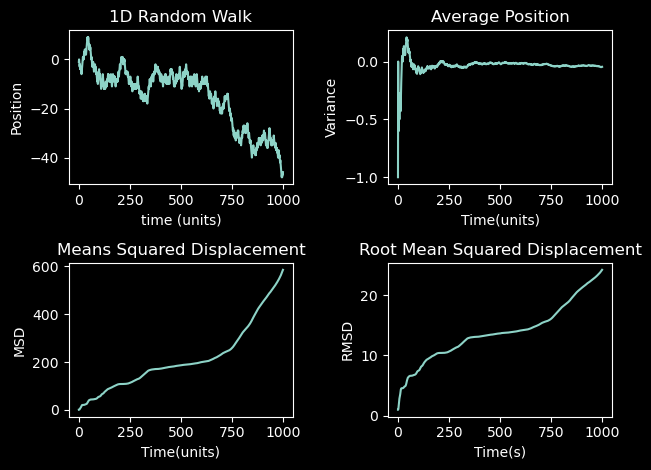

In [163]:
# Position and Variance of a simple 1D random walk

import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_steps=10**3 # The number of steps in the walk
time_step = 0.1 # Time required for one full step

# Model
time_array=np.arange(1, num_steps+1)

steps=np.random.choice([-1, 1], size=num_steps)

position=np.cumsum(steps)

average_position=position/time_array

squared_displacement=position ** 2
MSD=np.cumsum(squared_displacement / time_array)

RMSD=np.sqrt(MSD)

# Set the plot style
with plt.style.context('dark_background'):

    # Plot the random walk position
    plt.subplot(2, 2, 1) #nrows, ncols, index
    plt.plot(position)
    plt.title("1D Random Walk")
    plt.xlabel("time (units)")
    plt.ylabel("Position")

    # Plot the variance over steps
    plt.subplot(2, 2, 2)
    plt.plot(average_position)
    plt.title("Average Position")
    plt.xlabel("Time(units)")
    plt.ylabel("Variance")

    # Plot the variance over steps
    plt.subplot(2, 2, 3)
    plt.plot(MSD)
    plt.title("Mean Squared Displacement")
    plt.xlabel("Time(units)")
    plt.ylabel("MSD")

    # Plot the variance over steps
    plt.subplot(2, 2, 4)
    plt.plot(RMSD)
    plt.title("Root Mean Squared Displacement")
    plt.xlabel("Time(s)")
    plt.ylabel("RMSD")

    plt.tight_layout()
    plt.show()

## Adding Plot Animation

In [10]:
# Position and Variance of a simple 1D random walk

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import Video

# Parameters
num_steps=10**2 # The number of steps in the walk
time_step = 0.1 # Time required for one full step
time_array=np.arange(1, num_steps+1)

# Model

steps=np.random.choice([-1, 1], size=num_steps)

position=np.cumsum(steps)

average_position=position / time_array

squared_displacement=position ** 2
MSD=np.cumsum(squared_displacement / time_array)

RMSD=np.sqrt(MSD)


# Animated Plots
with plt.style.context("dark_background"):
    # Set up the figure and axes
    fig, axes = plt.subplots(2, 2, figsize=(8, 4))
    (ax1, ax2), (ax3, ax4) = axes
    # Initialize lines for position and variance
    line1, = ax1.plot([], [], lw=2)
    line2, = ax2.plot([], [], lw=2)
    line3, = ax3.plot([], [], lw=2)
    line4, = ax4.plot([], [], lw=2)

    # Set up the axes limits and labels
    ax1.set_xlim(0, num_steps)
    ax1.set_ylim(position.min() * 1.1, position.max() * 1.1)
    #ax1.set_title("1D Random Walk")
    ax1.set_xlabel("Time")
    ax1.set_ylabel("Position")

    ax2.set_xlim(0, num_steps)
    ax2.set_ylim(0, average_position.max() * 1.1)
    ##ax2.set_title("Average Position")
    ax2.set_xlabel("Time")
    ax2.set_ylabel("Mean Position")

    ax3.set_xlim(0, num_steps)
    ax3.set_ylim(0, MSD.max() * 1.1)
    #ax3.set_title("Mean Squared Displacement")
    ax3.set_xlabel("Time")
    ax3.set_ylabel("MSD")

    ax4.set_xlim(0, num_steps)
    ax4.set_ylim(0, RMSD.max() * 1.1)
    #ax4.set_title("Root Mean Squared Displacement")
    ax4.set_xlabel("Time")
    ax4.set_ylabel("RMSD")

    # Use tight layout to automatically adjust for overlap
    fig.tight_layout(pad=2.0)

    # Initialization function to clear the data at the start of the animation
    def init():
        line1.set_data([], [])
        line2.set_data([], [])
        line3.set_data([], [])
        line4.set_data([], [])
        return line1, line2, line3, line4

    # Update function for each frame
    def update(frame):
        # Update position line (up to current frame)
        line1.set_data(np.arange(frame), position[:frame])
    
        # Update average position line (up to current frame)
        line2.set_data(np.arange(frame), average_position[:frame])

        # Update MSD line (up to current frame)
        line3.set_data(np.arange(frame), MSD[:frame])

        # Update RMSD line (up to current frame)
        line4.set_data(np.arange(frame), RMSD[:frame])
    
        return line1, line2, line3, line4

    # Create the animation
    ani = FuncAnimation(fig, update, frames=np.arange(1, num_steps), init_func=init, blit=False, interval=10)


    # Save the animation as an MP4 using ffmpeg
    ani.save("random_walk_dark.mp4", writer="ffmpeg", fps=15)

# Display the saved video in Jupyter Notebook (optional)
video=Video("random_walk_dark.mp4", embed=True)
display(video)

# prevent display of last frame
plt.close(fig)

## Probability Mass Function (PMF) for Position

After N steps, the position is $$X_N=\sum_{i=1}^N{\Delta{x_i}}$$

Since each step in the simple random walk is either {$+1, -1$}, $X_N$ will be an integer between $\pm{N}$.

Each possible position after N steps, $X_N=k$ results from taking $N_+$ steps forward (each at a value of +1) and $N_-=N-N_{+}$ steps backward (each at a value of -1).

So, $k=N_{+}-N_{-}$, where $k$ is the final position after N steps. For example, if four $N_+$ steps were taken, and two $N_-$ steps, then $k=4-2=2$

After an even number of steps, the position $(k)$ must be even, after an off number of steps, the $(k)$ must be odd.

So, $$N_+=\frac{N+k}{2}$$

and, $$N_-=\frac{N-k}{2}$$

The probability of $X_N=k$ is given by the [binomial distribution](https://en.wikipedia.org/wiki/Binomial_distribution)

$$P(X_N=k)=\binom{N}{N_+}\frac{1}{2}^N$$

Substituting the above terms, we have $$P(X_N=k)=\binom{N}{\frac{N+k}{2}}\frac{1}{2}^N$$ 

For large N, the probability of observing the walker at a particular position becomes approximately normally distributed. The approximate PMF then becomes $$P(X_N=k)=\frac{1}{\sqrt{2\pi{N}}}e^{\frac{-k^2}{2N}}$$

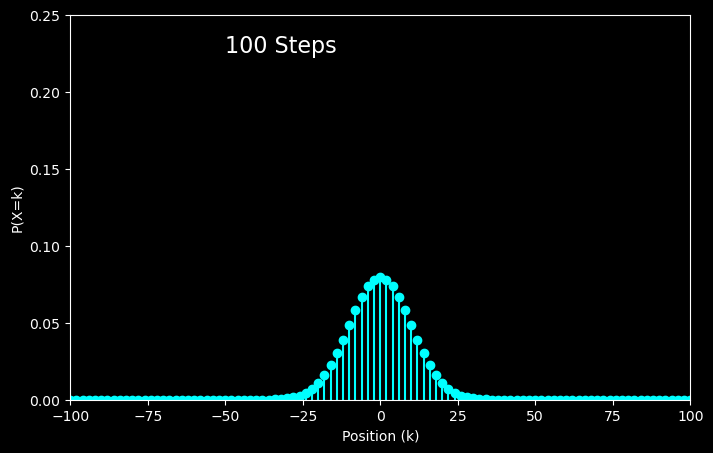

In [70]:
# Plot the PMF
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb
from matplotlib.animation import FuncAnimation
from IPython.display import Video

def pmf_random_walk(N):
    # Possible positions (only even or odd positions, depending on N)
    k_values = np.arange(-N, N + 1, 2)  # Positions reachable with N steps
    pmf_values = []

    for k in k_values:
            if (N + k) % 2 == 0:  # Ensure that (N + k) is even
                N_plus = (N + k) // 2  # Number of +1 steps required
                # Calculate PMF using the binomial coefficient
                pmf_k = comb(N, N_plus) * (0.5 ** N)
                pmf_values.append(pmf_k)
            else:
                pmf_values.append(0)  # Position not reachable for this N

    return k_values, pmf_values

# Parameters
N_max = 100 # Maximum number of steps in the random walk

# Apply the dark background style
with plt.style.context("dark_background"):
    # Set up the figure
    fig, ax = plt.subplots(figsize=(8, 5))
    
    # Initialize plot elements
    stem_line, = ax.plot([], [], marker='o', color='cyan', linestyle="none")  # PMF points
    ax.vlines([], ymin=0, ymax=[], color='cyan')  # PMF stems
    title = ax.text(0.25, 0.95, "", ha="left", va="top", transform=ax.transAxes, color="white", fontsize=16)
    ax.set_xlim(-N_max, N_max)
    ax.set_ylim(0, 0.25)
    ax.set_xlabel("Position (k)", color="white")
    ax.set_ylabel("P(X=k)", color="white")

    # Update function for the animation
    def update(N):
        # Calculate PMF for the current N
        k_values, pmf_values = pmf_random_walk(N)
        
        # Update the plot data
        stem_line.set_data(k_values, pmf_values)
        ax.collections.clear()  # Clear previous vlines
        ax.vlines(k_values, [0], pmf_values, color='cyan')
        
        # Update the title to show current N
        title.set_text(f"{N} Steps")

    # Create the animation
    ani = FuncAnimation(fig, update, frames=np.arange(1, N_max + 1), interval=300)

    # Save the animation as an MP4 using ffmpeg
    ani.save("random_walk_pmf_animation.mp4", writer="ffmpeg", fps=5)

# Display the saved video in Jupyter Notebook (optional)
Video("random_walk_pmf_animation.mp4", embed=True)

## First Passage Time

First Passage Time for a 1D Random Walk

The first passage time in a 1D random walk describes the time required for a walker to reach a specified target position $(k)$ for the first time. Given a symmetric random walk on an integer line, where the walker steps left with probability $q$ and right with probability $p$ (with $p + q = 1$), we want to find the expected time for the walker to first reach position $k$ starting from the origin.

**Setup**

- **Step Direction**: Each step moves either right ($+1$) or left ($-1$), with probabilities $p$ and $q$, respectively.
- **Position after $n$ Steps**: Let $S_n$ represent the position after $n$ steps, defined as the sum $S_n = X_1 + X_2 + \ldots + X_n$, where $X_j = +1$ or $X_j = -1$.
  
The **event $F_n$** denotes the first time the walker reaches $k$: $S_n = +1$ while all prior steps have positions $S_1, S_2, \ldots, S_{n-1} \leq 0$.

**Derivation Using Generating Functions**

To find the probability of reaching $k$ for the first time at step $n$, we define a generating function:
$$
\Phi(t) = \sum_{n=0}^{\infty} \varphi_n t^n
$$
where $\varphi_n$ is the probability of first reaching $k$ at step $n$. Using conditional expectations and considering cases where the first step goes either left or right, we derive that:
$$
\Phi(t) = \frac{1 - \sqrt{1 - 4pq t^2}}{2qt}
$$

**Implications of the Expected First Passage Time**

For a fair random walk ($p = q = 0.5$), the probability that the walker will eventually reach $k$ is $1$, but the **expected time** to first reach $k$ is infinite. This result means that while the walker almost surely reaches $k$ eventually, the average time required is unbounded, implying that first passage events are infrequent over long time intervals.

Reference: [UC Davis Math](https://www.math.ucdavis.edu/~tracy/courses/math135A/UsefullCourseMaterial/firstPassage.pdf)


First passage time to reach position 10: 258 steps


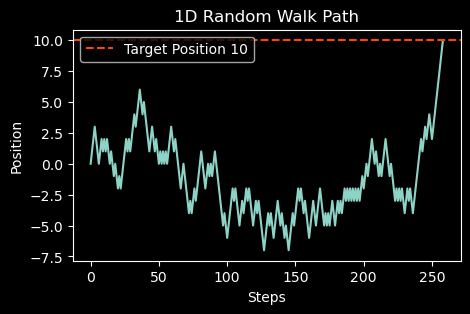

In [65]:
# First passage time simulator
import numpy as np
import matplotlib.pyplot as plt

def simulate_first_passage(target_position, max_steps=10000):
    # Initialize variables
    position = 0  # Start at 0
    steps = 0  # Count the number of steps taken
    
    # Track the random walker's path
    path = [position]
    
    # Perform the random walk
    while position != target_position and steps < max_steps:
        step = np.random.choice([-1, 1])  # Randomly take +1 or -1 step
        position += step
        path.append(position)
        steps += 1
    
    # Check if target was reached within max_steps
    if position == target_position:
        return steps, path
    else:
        return None, path  # If max_steps is reached without hitting target

# Parameters
target_position = 10  # Position we want to reach
max_steps = 10000  # Limit on the number of steps to avoid running indefinitely

# Run the simulation
first_passage_time, path = simulate_first_passage(target_position, max_steps)

# Display results
if first_passage_time is not None:
    print(f"First passage time to reach position {target_position}: {first_passage_time} steps")
else:
    print(f"Did not reach position {target_position} within {max_steps} steps")

# Plot the path
plt.style.use('dark_background')
plt.figure(figsize=(5, 3))
plt.plot(path)
plt.axhline(target_position, color="orangered", linestyle="--", label=f"Target Position {target_position}")
plt.title("1D Random Walk Path")
plt.xlabel("Steps")
plt.ylabel("Position")
plt.legend()
plt.show()

# Correlated 1D Random Walk

In a simple random walk the choice of direction at each step ${+1,-1}$ is independent. For a correlated walk, the walkers exhibit persistence $p$. In other words, the probability of choosing one direction or the other depends on their previous choice of direction. 

The persistence probability $p$ denotes the probability of repeating the direction of the last step, while $1-p$ is the probability of choosing the opposite direction.  

When $p=0.5$ the walk is uncorrelated. When $p<0.5$ the walk is negatively correlated and will tend to move in the opposite direction of its previous step. When $p>0.5$ the walk is positively correlated and will tend to move in the direction of its previous step.

One useful way to analyze a correlated random walk is by assessing the way that the steps vary in relation to one another. To do this, we can plot the autocorrelation to visualize how the walk varies with itself at different timepoints (or step lengths along the path).

Let the steps $s_i$ be defined

$$ s_i = \begin{cases} +1 & \text{if the step is to the right} \\ -1 & \text{if the step is to the left} \end{cases}$$

The covariance between two random variables $X$ and $Y$ is $$COV(X,Y)=E[XY]-E[X]E[Y]$$

For the steps in the walk we have: $$COV(s_{i}s_{i+1})=E[s_{i}s_{i+1}]-E[s_i]E[s_{i+1}]$$

Since $E[s_i]=0$, the relation simplifies to $$COV(s_{i}s_{i+1})=E[s_{i}s_{i+1}]$$

$E[s_{i}s_{i+1}]$ from $s_{i}=+1$ is $$p\cdot{(1)}+(1-p)\cdot{(-1)}=2p-1$$

The same is true for $s_{i}=-1$. We define this term the autocorrelation coefficient $\rho=2p-1$, and:

$$ \rho = \begin{cases} 0 & \text{uncorrelated} \\ +1 & \text{perfect persistence} \\ -1 & \text{perfect antipersistence} \end{cases}$$

The following program plots a 1D correlated random walk with persistence parobability $p$. The program also plots the autocorrelation of the path, which can be interpreted in the following way: the lag tells us how the positions at step $n$ are correlated with positions at step $n+k$ where k is the lag. In other words, the autocorrelation is +1 for a particular lag if the walk moves in the same direction at every step during $n+k$. The autocorrelation would be $-1$ if the walk changed directions at every step during $n+k$. Autocorrelation of $0$ indicates that the direction at any given $n$ is random. 

Note that a correlated random walk with a $p=0.7$ will converge on $\text{autocorrelation}=0$ as the lag grows. At the point of convergence the walk forgets its initial trajectory. A random walk forgets its trajectory over very short distances... It has been said that a correlated random walk is the simplest form of `memory` in a stochastic process. The point at which the initial trajectory is forgotten is known as the `persistence length`.  

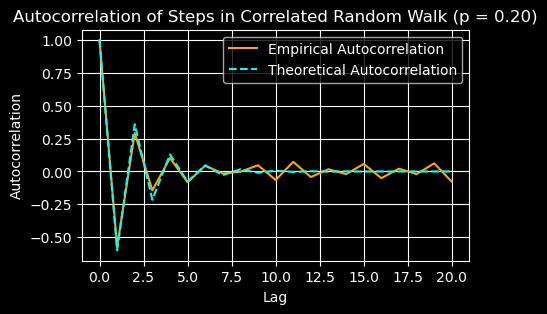

In [127]:
import numpy as np
import matplotlib.pyplot as plt

def correlated_random_walk(num_steps=1000, persistence_prob=0.9):
    position = 0
    path = [position]
    step = np.random.choice([-1, 1])
    position += step
    path.append(position)
    for _ in range(1, num_steps):
        if np.random.rand() < persistence_prob:
            position += step
        else:
            step = -step
            position += step
        path.append(position)
    return path

# Parameters
num_steps = 1000
persistence_prob = 0.2

# Simulate the random walk
positions = correlated_random_walk(num_steps, persistence_prob)

# Calculate the steps
steps = np.diff(positions)

def compute_autocorrelation(x, max_lag):
    n = len(x)
    mean = np.mean(x)
    var = np.var(x)
    autocorr = []
    for lag in range(max_lag + 1):
        if lag == 0:
            autocorr.append(1)
        else:
            cov = np.mean((x[:n - lag] - mean) * (x[lag:] - mean))
            autocorr.append(cov / var)
    return autocorr

max_lag = 20
empirical_autocorr = compute_autocorrelation(steps, max_lag)

rho = 2 * persistence_prob - 1
theoretical_autocorr = [rho ** lag for lag in range(max_lag + 1)]

# Plot the autocorrelation
plt.style.use('dark_background')
plt.figure(figsize=(5, 3))
lags = range(max_lag + 1)
plt.plot(lags, empirical_autocorr, marker='', color='orange', label='Empirical Autocorrelation')
plt.plot(lags, theoretical_autocorr, marker='', color='cyan', linestyle='--', label='Theoretical Autocorrelation')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation of Steps in Correlated Random Walk (p = {:.2f})'.format(persistence_prob))
plt.legend()
plt.grid(True)
plt.show()